# 泰坦尼克号生存者预测

## 一、数据分析

### 数据加载

In [1]:
#导入数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

### 特征详情

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 特征分析

In [6]:
#train数据存活人数分布
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* 相关性分析

In [7]:
#相关性协方差表，返回结果0说明无相关性，大于0正相关，小于0负相关
train_corr = train.drop('PassengerId',axis=1).corr()#drop函数默认删除行，删除列需要加axis=1
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


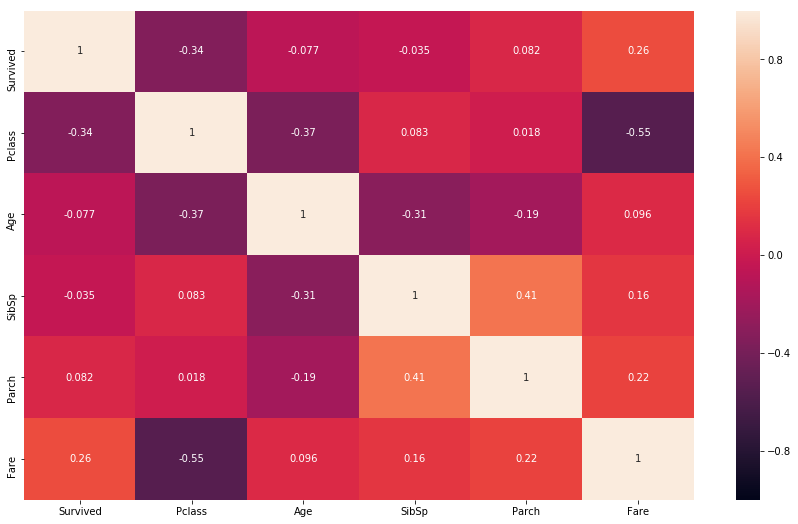

In [8]:
#可以看出与Pclass和Fare相关性较强一点，其他非数值化参数未加入协方差表分析
#为了直观看出，画出相关性热力图
a=plt.subplots(figsize=(15,9))#调整画布大小
a=sns.heatmap(train_corr,vmin=-1,vmax=1,annot=True)

* 可以看出数据与Pclass相关性最高，进一步查看Pclass、Fare与Survived关系

In [9]:
train[['Pclass','Fare','Survived']].groupby('Pclass').mean()

,Fare,Survived
Pclass,,
1,84.154687,0.629630
2,20.662183,0.472826
3,13.675550,0.242363


* 可以看出社会地位越高，票价越高，存活几率越大,究其根本原因还是社会地位导致，故**社会地位为第一个主要特征**

* 进一步画成柱状图更直观一点

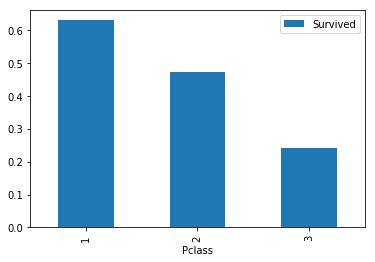

In [10]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

* 分析其他未在协方差中体现的数据对最终存活率的影响

In [11]:
train.groupby(['Sex'])[['Sex','Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


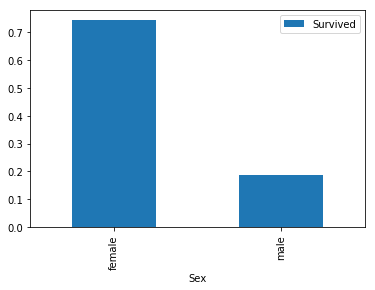

In [12]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

* 由上图可看出女性的存活概率比男性明显要高，故**性别为第二个主要特征**

In [13]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


* SibSp and Parch 兄妹配偶数/父母子女数，特征不是特别明显

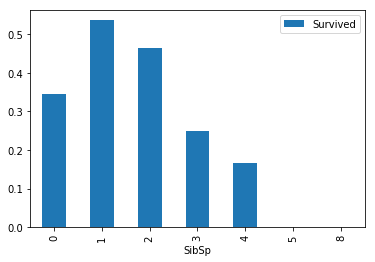

In [14]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

* 分析年龄与存活率的关系

C:\Users\hero\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


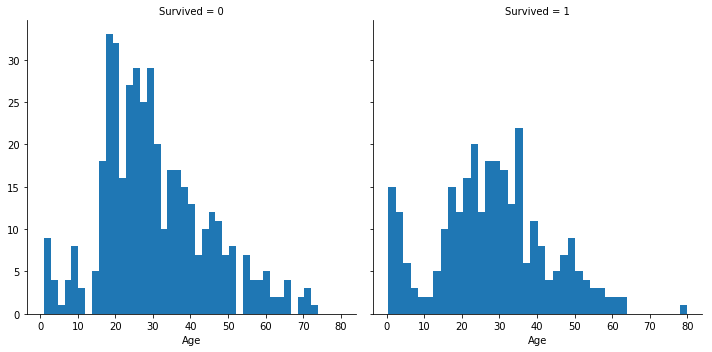

In [15]:
g=sns.FacetGrid(train,col='Survived',size=5)
g.map(plt.hist,'Age',bins=40)

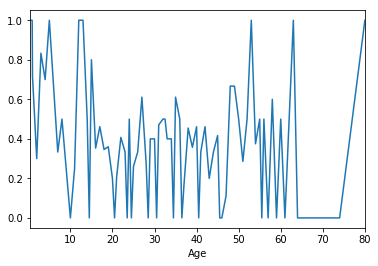

In [16]:
train.groupby(['Age'])['Survived'].mean().plot()

* Embarked登港港口与生存情况分析

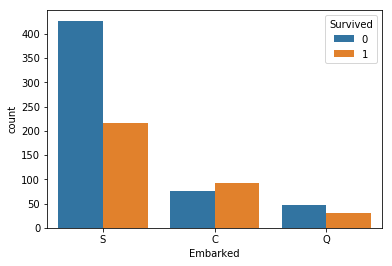

In [17]:
sns.countplot('Embarked',hue='Survived',data=train)


* 由上图可见，C地的生存率更高，故**Embarked应保留为模型特征**
* 在数据的Name项中包含了对该乘客的称呼，如Mr、Miss等，这些信息包含了乘客的年龄、性别、也有可能包含社会地位，如Dr、Lady、Major、Master等称呼。这一项不方便用图表展示，但是在特征工程中，我们会将其提取出来,然后放到模型中。
剩余因素还有船票价格、船舱号和船票号，这三个因素都可能会影响乘客在船中的位置从而影响逃生顺序，但是因为这三个因素与生存之间看不出明显规律，所以在后期模型融合时，将这些因素交给模型来决定其重要性。

## 二、特征工程

In [18]:
#先将数据集合并，一起做特征工程（注意：标准化的时候需要分开处理）
#先将test数据集的‘Survived’项补齐，然后通过pd.apped()合并
test['Survived']=0
train_test=train.append(test)

C:\Users\hero\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### 特征处理

1. Pclass乘客等级，1是最高级

In [19]:
    train_test=pd.get_dummies(train_test,columns=['Pclass'])#pd.get_dummies(data，columns)把某一（些）列转换为one hot encode若干列的函数实现

2. Sex性别，无缺失值，可直接分列

In [20]:
train_test=pd.get_dummies(train_test,columns=['Sex'])

3. SibSp and Parch 兄妹配偶数/父母子女数 

两种方案：①直接保留②两项求和再分列处理（认识人的数量）最终发现②效果更好一些

In [21]:
train_test['SibSp_Parch']=train_test['SibSp']+train_test['Parch']
train_test=pd.get_dummies(train_test,columns=['SibSp','Parch','SibSp_Parch'])

4. Embarked数据有极少量缺失值（3个），在分列时候，缺失值的所有列为0，可当做其中一类，不影响分列

In [22]:
train_test=pd.get_dummies(train_test,columns=['Embarked'])

5. Name,在Name中包含了对乘客的称呼，将此提取可以增加部分信息

In [24]:
#1、从名字中提取出称呼： df['Name].str.extract()是提取函数,配合正则一起使用,expand为是否返回数据框dataframe/索引index
train_test['Name1']=train_test['Name'].str.extract('.+,(.+)',expand=False).str.extract('^(.+?)\.',expand=False).str.strip()

In [26]:
#将姓名分类处理
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [27]:
#再进行分列
train_test=pd.get_dummies(train_test,columns=['Name1'])

In [29]:
#2、从姓名中提取姓氏作为特征
train_test['Name2']=train_test['Name'].apply(lambda x: x.split('.')[1])


In [37]:
#计算数量，合并数据集
Name2_sum=train_test['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
train_test=pd.merge(train_test,Name2_sum,how='left',on='Name2')

In [38]:
train_test.loc[train_test['Name2_sum']==1,'Name2_new']='one'
train_test.loc[train_test['Name2_sum']>1,'Name2_new']=train_test['Name2']

In [39]:
del train_test['Name2']


In [51]:
del train_test['Name2_sum_x']

In [52]:
del train_test['Name2_sum_y']

In [41]:
#分列处理
train_test=pd.get_dummies(train_test,columns=['Name2_new'])

In [42]:
del train_test['Name']

6. Fare 票价，
该特征值有缺失值，先找到缺失值，用平均数填充

In [62]:
#查看缺失值
train_test.loc[train_test['Fare'].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,...,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,NaN,1044,0,...,0,0,0,0,0


In [76]:
#显示10列,第二项为0时为显示所有列
pd.set_option('display.max_columns', 10)

In [58]:
#票价与Pclass和Embarked有关，所以用tain分组后的平均数填充
train.groupby(by=['Pclass','Embarked'])['Fare'].mean()
#另一种写法相同效果
#train.groupby(by=['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [63]:
#用Pclass=3和Embarked=S的平均数14.644083来填充
train_test['Fare'].fillna(14.644083,inplace=True)

7. Ticket
与名字相同，先提取字符串再分列

In [70]:
#提取Ticket字符串
#str.isnumeric() 如果只有数字字符返回True，否则返回False
train_test['Ticket_letter']=train_test['Ticket'].str.split().str[0]
train_test['Ticket_letter']=train_test['Ticket_letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [74]:
#分列，nan值不做处理
train_test=pd.get_dummies(train_test,columns=['Ticket_letter'],drop_first=True)

8. Age 

* ①年龄有大量缺失值，考虑用一个回归模型进行填充
* ②在模型修改的时候，考虑到年龄缺失值可能影响死亡情况，故可用年龄是否缺失建立新特征

In [78]:
#查看年龄缺失的死亡率有多少
train_test.loc[train_test['Age'].isnull()]['Survived'].mean()

0.19771863117870722

In [81]:
train_test.loc[train_test['Age'].notnull()]['Survived'].mean()

0.27724665391969405

In [83]:
#用年龄是否缺失来构造新特征
train_test.loc[train_test['Age'].isnull(),'age_nan']=1
train_test.loc[train_test['Age'].notnull(),'age_nan']=0
train_test=pd.get_dummies(train_test,columns=['age_nan'])

* 利用其它特征量，拟合大量缺失的Age

In [84]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 187 entries, Age to age_nan_1.0
dtypes: float64(2), int64(3), object(1), uint8(181)
memory usage: 343.0+ KB


In [85]:
#创建没有['Survived','Cabin']的数据集
missing_age=train_test.drop(['Survived','Cabin'],axis=1)
missing_age_train=missing_age[missing_age['Age'].notnull()]
missing_age_test=missing_age[missing_age['Age'].isnull()]

In [87]:
#构建训练集合预测集的X和Y
missing_age_X_train=missing_age_train.drop(['Age'],axis=1)
missing_age_Y_train=missing_age_train['Age']
missing_age_X_test=missing_age_test.drop(['Age'],axis=1)

In [88]:
#先将训练数据标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#ss.fit(data)计算data数据中的参数，（均值），（标准差），并存储在对象ss中
ss.fit(missing_age_X_train)
#标准化转换
missing_age_X_train=ss.transform(missing_age_X_train)
missing_age_X_test=ss.transform(missing_age_X_test)

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hero\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\hero\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [89]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin=linear_model.BayesianRidge()

In [90]:
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [91]:
#利用训练出来的模型预测缺失的年龄
train_test.loc[(train_test['Age'].isnull()),'Age']=lin.predict(missing_age_X_test)

In [94]:
#将年龄划分为几个阶段，0-10,10-18,18-30,30-50,50以上
train_test['Age']=pd.cut(train_test['Age'],bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])
#分列
train_test=pd.get_dummies(train_test,columns=['Age'])

9.Cabin
缺失值过多，用Cabin首字母进行分类，缺失项为一类，当然也可以考虑直接舍弃这一特征

In [95]:
train_test['Cabin_nan']=train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test=pd.get_dummies(train_test,columns=['Cabin_nan'])

In [96]:
train_test.loc[train_test['Cabin'].isnull(),'Cabin_nan']=1
train_test.loc[train_test['Cabin'].notnull(),'Cabin_nan']=0
train_test=pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.drop('Cabin',axis=1,inplace=True)

### 划分数据集

In [97]:
train_data=train_test[:891]
test_data=train_test[891:]
train_data_X=train_data.drop(['Survived'],axis=1)
train_data_Y=train_data['Survived']
test_data_X=test_data.drop(['Survived'],axis=1)

### 数据规约

* 线性模型需要标准化的数据建模，而树形模型不需要标准化的数据
* 注意处理标准化时，test数据集transform时用的fit数据为测试集

In [98]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd=ss2.transform(train_data_X)
test_data_X_sd=ss2.transform(test_data_X)

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hero\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\hero\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## 三、建立模型

### 模型发现
1. 可选单个模型，有随机森林、逻辑回归、svm、xgboost、gbdt等；
2. 多模型组合，模型融合，有voting，stacking等方法；
3. 好的特征决定模型上限，好的模型和参数可以无限逼近上限；
4. 经多种模型测试，模型结果最高的为随机森林，最高有0.8。

### 构建模型

> 随机森林RandomForest

* 训练数据并预测

In [100]:
from sklearn.ensemble import RandomForestClassifier

#随机森林RandomForestClassifier（）
#注意随机森林训练和预测数据均不需要标准化
#参数n_estimators:子树数量，相当于投票人数，在机器性能允许情况下越大越好
#参数min_samples_leaf:最少样本叶子节点数目，大小需要调试，需要找到最优
#参数max_depth:单树最大深度
#参数oob_score:交叉参考分数
#另其他参数max_features：随机森林允许单个决策树使用特征的最大数量。增加max_features一般能提高模型的性能，但降低了单个树多样性
rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)

test['Survived']=rf.predict(test_data_X)
RF=test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')

* 保存效果较好的模型

In [101]:
#随机森林是随机选取特征进行建模的，所以每次结果可能有小差异
#如果分数足够好，可以将该模型保持下来，下次可直接调用
#如下保存模型为rf10.pkl
from sklearn.externals import joblib
joblib.dump(rf,'rf10.pkl')

['rf10.pkl']

>逻辑回归LogisticRegression

* 利用GridSearchCV搜索最佳超参数

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#GridSearchCV超参数自动搜索模块
#cv :交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield训练/测试数据的生成器。
#verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
#n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值。
lr=LogisticRegression()
param={'C':[0.001,0.01,0.1,1,10],'max_iter':[100,250]}
clf=GridSearchCV(lr,param,cv=5,n_jobs=-1,verbose=1,scoring='roc_auc')
clf.fit(train_data_X_sd,train_data_Y)

#打印参数得分情况
#clf.cv_results_
#打印最佳参数
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Def

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

{'C': 0.01, 'max_iter': 100}

* 利用最佳参数训练模型

In [113]:
#将最佳参数传入训练模型
#lr=LogisticRegression(clf.best_params_)
#lr.fit(train_data_X_sd,train_data_Y)
#新版本可以直接用clf预测数据
#输出结果
test['Survived']=clf.predict(test_data_X_sd)
LR=test[['PassengerId','Survived']].set_index('PassengerId')
LR.to_csv('LR.csv')


* 保存模型

In [114]:
joblib.dump(clf,'lr.pkl')

['lr.pkl']

>支持向量机SVM（Support Vector Machine）

In [115]:
from sklearn import svm
svc=svm.SVC()

clf=GridSearchCV(svc,param,cv=5,n_jobs=-1,verbose=1,scoring='roc_auc')
clf.fit(train_data_X_sd,train_data_Y)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: C

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processin

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processin

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.4s finished
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: Th

{'C': 1, 'max_iter': 250}

* 训练并预测结果

In [116]:
#根据网格搜索到的最佳参数设置分类器参数
svc=svm.SVC(C=1,max_iter=250)

#训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
test['Survived']=svc.predict(test_data_X_sd)

#输出结果
SVM=test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm.csv')

#保存模型
joblib.dump(svc,'svc.pkl')


C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hero\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


['svc.pkl']

>梯度提升树GBDT(Gradient Boosting Decision Tree) 

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier(learning_rate=0.7,max_depth=6,n_estimators=100,min_samples_leaf=2)

gbdt.fit(train_data_X,train_data_Y)

test['Survived']=gbdt.predict(test_data_X)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('gbdt.csv')

joblib.dump(gbdt,'gbdt.pkl')

['gbdt.pkl']

>极端梯度提升XGBoost（eXtreme Gradient Boosting）

In [121]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6)
xgb_model.fit(train_data_X,train_data_Y)

test['Survived']=xgb_model.predict(test_data_X)
XGB=test[['PassengerId','Survived']].set_index('PassengerId')
XGB.to_csv('XGB.csv')
joblib.dump(xgb_model,'xgb.pkl')

['xgb.pkl']

## 四、模型融合

> 模型融合方式：Voting

In [122]:
#joblib.load('')加载模型， 如：clf = joblib.load("rf.pkl")
from sklearn.ensemble import VotingClassifier

#线性回归
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1,max_iter=100)

#xgboost
import xgboost as xgb
xgb_model=xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round=5)#num_round表示boosting的循环次数

#randomforest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

#GBDT
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

#模型融合
vot=VotingClassifier(estimators=[('lr',lr),('rf',rf),('gbdt',gbdt),('xgb',xgb_model)],voting='hard')
vot.fit(train_data_X_sd,train_data_Y)#树类型对数据容忍度高，故也可用标准化后的数据

test['Survived']=vot.predict(test_data_X_sd)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot.csv')

C:\Users\hero\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> 模型融合方式：Stacking